# Module 6: Decision Trees and Ensemble Learning

## 1 : Data Extraction: Credit Scoring data to assess an individual's probability of defaulting from a loan

In [2]:
!wget https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv

--2025-05-27 18:15:42--  https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2025-05-27 18:15:43 (10.7 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]



## 2: Data Cleaning and Preparation

In [3]:
## Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
## formalising the column names

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [7]:
## Many of the values are not in string format, for example status which are encoded as numbers
## We convert them back to string so that we can do encoding later on.

status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
## Replacing missing values
df.income = df.income.replace(to_replace=99999999, value = np.nan)

In [12]:
df.income.max()

np.float64(959.0)

In [13]:
## NUmerical
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value = np.nan)

In [14]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [15]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [16]:
# FIlter out the unknown status ones because wwe don't know what to do with them (as of now)

df = df[df.status != 'unk']


In [17]:
df.status.value_counts()


status
ok         3200
default    1254
Name: count, dtype: int64

In [18]:
df = df.reset_index(drop = True)

In [19]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [20]:
from sklearn.model_selection import train_test_split

df_full_train, df_test= train_test_split(df, test_size = 0.2, random_state= 11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [21]:
df_train = df_train.reset_index(drop =  True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop=True)

In [22]:
df_train.status

0       default
1       default
2            ok
3       default
4            ok
         ...   
2667         ok
2668         ok
2669         ok
2670         ok
2671         ok
Name: status, Length: 2672, dtype: object

In [23]:
## Encoding

y_train = (df_train.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype(int).values


## Drop status col from the train, val, and the test data set


In [24]:
df_train = df_train.drop(axis=1, columns = ['status'])
df_test = df_test.drop(axis=1, columns = ['status'])
df_val = df_val.drop(axis=1, columns = ['status'])

In [25]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## 3: Decision Trees

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [27]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [28]:
train_dicts

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [29]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)


In [30]:
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]],
      shape=(2672, 29))

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [32]:
val_dicts = df_val.fillna(0).to_dict(orient ='records')
X_val = dv.transform(val_dicts)

In [33]:
y_pred = dt.predict_proba(X_val)[:,1]

In [34]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.6489580053764743)

In [35]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred)
auc_train ## Overfitting

np.float64(1.0)

In [36]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [37]:
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('validation AUC', auc)


validation AUC 0.7507265505800296


In [38]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred)
print('Training AUC:', auc_train) ## Overfitting

Training AUC: 0.8995915723057856


In [39]:
## Visualizing test
from sklearn.tree import export_text

In [40]:
print(export_text(dt, feature_names= dv.feature_names_))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- seniority <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- seniority >  0.50
|   |   |   |   |--- income <= 50.50
|   |   |   |   |   |--- price <= 1250.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- price >  1250.00
|   |   |   |   |   |   |--- expenses <= 75.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- expenses >  75.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  50.50
|   |   |   |   |   |--- home=rent <= 0.50
|   |   |   |   |   |   |--- price <= 720.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- price >  720.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- home=rent >  0.50
|   |   |   |   |   |   |--- assets <= 3500.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- assets >  3500.00
|   |   |   |   |   |   |   |--- class: 0
|   |  

## 4:  Decision Tree Learning Algorithm


Helper Functions
* Best Split Finder function(node/df):
    Find features
    for f in features:
        find relevant thresholds
        for t in thresholds:
            split df into left_df and right_df
            evaluate the average purity of the split
        select best threshold(i,e with lowest avg purity)
    select best feature with best threshold with the lowest purity

PSUEDOCODE (FIT ALGORITHM):
* Find the best split for the current node
* Stop if max_depth has been reached
* If left is 'sufficientlt large' and not pure:
    repeat fit algorithm on the left node
* If right is 'sufficiently large' and not pure:
    repeat fit algorithm on the right node

## 5: Decision Trees Parameter Tuning

HyperParameters:
- max_depth
- min_samples_leaf (sufficiently large criteria)

In [41]:
## Selecting over max_depth
scores = []
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    for s in [ 1,2, 5, 10, 15, 20, 100, 200, 500]: #min_samples
        dt = DecisionTreeClassifier(max_depth =d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, auc))
scores

[(1, 1, np.float64(0.6058644740984719)),
 (1, 2, np.float64(0.6058644740984719)),
 (1, 5, np.float64(0.6058644740984719)),
 (1, 10, np.float64(0.6058644740984719)),
 (1, 15, np.float64(0.6058644740984719)),
 (1, 20, np.float64(0.6058644740984719)),
 (1, 100, np.float64(0.6058644740984719)),
 (1, 200, np.float64(0.6058644740984719)),
 (1, 500, np.float64(0.6200715652321329)),
 (2, 1, np.float64(0.6685264343319367)),
 (2, 2, np.float64(0.6685264343319367)),
 (2, 5, np.float64(0.6685264343319367)),
 (2, 10, np.float64(0.6685264343319367)),
 (2, 15, np.float64(0.6685264343319367)),
 (2, 20, np.float64(0.6685264343319367)),
 (2, 100, np.float64(0.6685264343319367)),
 (2, 200, np.float64(0.6688079726816981)),
 (2, 500, np.float64(0.679842459615897)),
 (3, 1, np.float64(0.7389079944782155)),
 (3, 2, np.float64(0.7389079944782155)),
 (3, 5, np.float64(0.7389079944782155)),
 (3, 10, np.float64(0.7389079944782155)),
 (3, 15, np.float64(0.7376123126104962)),
 (3, 20, np.float64(0.7357051173379187

In [42]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc_score'])
df_scores.head()

,max_depth,min_samples_leaf,auc_score
0,1.0,1,0.605864
1,1.0,2,0.605864
2,1.0,5,0.605864
3,1.0,10,0.605864
4,1.0,15,0.605864


In [43]:
df_scores.sort_values(by='auc_score', ascending=False)

,max_depth,min_samples_leaf,auc_score
58,10.0,15,0.790820
85,NaN,15,0.788428
67,15.0,15,0.787996
76,20.0,15,0.787720
59,10.0,20,0.785907
...,...,...,...
3,1.0,10,0.605864
5,1.0,20,0.605864
4,1.0,15,0.605864
7,1.0,200,0.605864


In [44]:
df_scores_pivot =  df_scores.pivot(index='min_samples_leaf', columns = ['max_depth'], values = ['auc_score'])

In [45]:
df_scores_pivot.round()

auc_score                                             
max_depth              NaN 1.0  2.0  3.0  4.0  5.0  6.0  10.0 15.0 20.0
min_samples_leaf                                                       
1                      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2                      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
5                      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
10                     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
15                     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
20                     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
100                    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
200                    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
500                    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

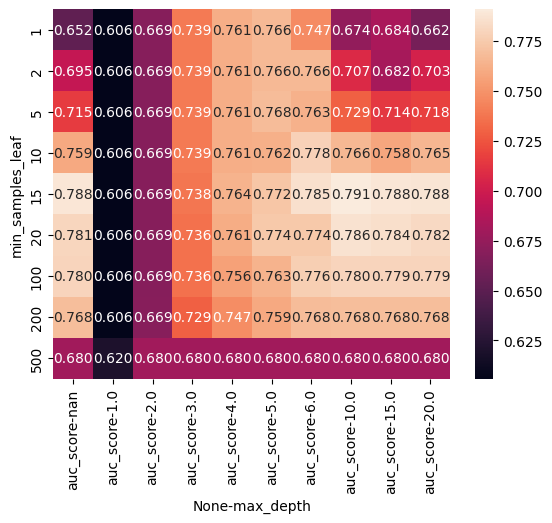

In [46]:
sns.heatmap(df_scores_pivot, annot = True, fmt = '.3f')

In [47]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## 6: Ensemble Learning and Random Forest
Random Forest is a bunch of decision Trees randomly initialied with different hyperparamters and the true output is the avg of all the outputs of these individual decision trees;
Each decision tree gets different sub set of features

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 1)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=1)

In [50]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    scores.append((n, roc_auc_score(y_val, y_pred)))


In [51]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])
df_scores.auc = df_scores.auc.round(4)

In [52]:
df_scores.head()

,n_estimators,auc
0,10,0.7745
1,20,0.8035
2,30,0.8151
3,40,0.8157
4,50,0.8171


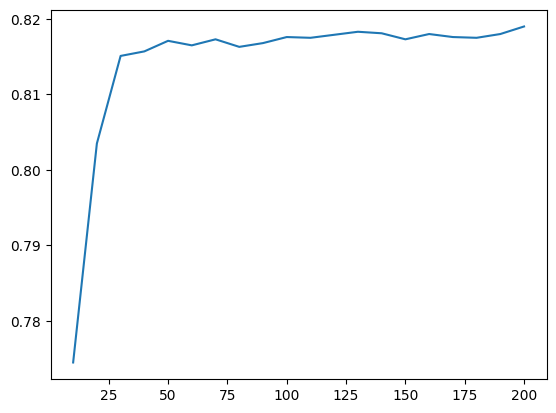

In [53]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [54]:
## best n_estimators is around 50 after which it stagnates
scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, random_state=1, max_depth=d)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        scores.append((d, n, roc_auc_score(y_val, y_pred)))


In [55]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'n_estimators', 'auc'])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


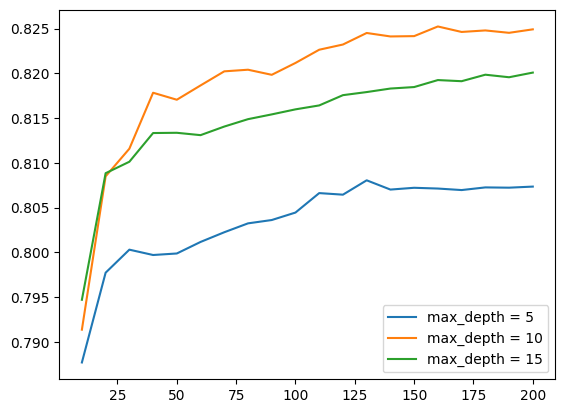

In [56]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = f'max_depth = {d}')
plt.legend()

## 7: Gradient Boosting and XGBoost

* Gradient Boosting vs Random Forest 
* Installing XGboost
* Training the first model
* Perforamcne Montinoring
* Parsing xgBoosts's monitoring output

In [57]:
!pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [58]:
import xgboost as xgb

In [59]:
features = dv.feature_names_
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [60]:
xgb_params = {
    'eta' : 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed':1,
    'verbosity': 1

}

model = xgb.train(xgb_params, dtrain, num_boost_round = 10)

In [61]:
y_pred = model.predict(dval)

In [62]:
roc_auc_score(y_val, y_pred)

np.float64(0.8118506454190986)

In [63]:
watchlist = [(dtrain, 'train'), (dval, 'validation')]

In [64]:
%%capture output
xgb_params = {
    'eta' : 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed':1,
    'verbosity': 1

}

model = xgb.train(xgb_params, dtrain, num_boost_round = 200, verbose_eval = 5, evals = watchlist)

In [65]:
s = output.stdout

In [66]:
s = s.split('\n')

In [67]:
s

['[0]\ttrain-auc:0.86653\tvalidation-auc:0.77999',
 '[5]\ttrain-auc:0.92969\tvalidation-auc:0.80822',
 '[10]\ttrain-auc:0.95512\tvalidation-auc:0.81115',
 '[15]\ttrain-auc:0.96767\tvalidation-auc:0.81993',
 '[20]\ttrain-auc:0.97648\tvalidation-auc:0.81877',
 '[25]\ttrain-auc:0.98248\tvalidation-auc:0.81520',
 '[30]\ttrain-auc:0.98844\tvalidation-auc:0.81613',
 '[35]\ttrain-auc:0.99244\tvalidation-auc:0.81453',
 '[40]\ttrain-auc:0.99393\tvalidation-auc:0.81407',
 '[45]\ttrain-auc:0.99568\tvalidation-auc:0.81392',
 '[50]\ttrain-auc:0.99723\tvalidation-auc:0.81276',
 '[55]\ttrain-auc:0.99804\tvalidation-auc:0.81299',
 '[60]\ttrain-auc:0.99861\tvalidation-auc:0.81244',
 '[65]\ttrain-auc:0.99916\tvalidation-auc:0.81197',
 '[70]\ttrain-auc:0.99962\tvalidation-auc:0.81243',
 '[75]\ttrain-auc:0.99975\tvalidation-auc:0.81152',
 '[80]\ttrain-auc:0.99989\tvalidation-auc:0.81359',
 '[85]\ttrain-auc:0.99993\tvalidation-auc:0.81193',
 '[90]\ttrain-auc:0.99998\tvalidation-auc:0.81038',
 '[95]\ttrain-

In [68]:
line = s[0]

## 7: XGboost Parameter Tuning
- ``eta``
- ``max_depth``
- ``min_child_depth``

In [69]:
print("hello world")

hello world
